In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score

In [4]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

In [5]:
from keras.models import load_model

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 1. Data load & preprocessing

In [7]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 68787205 Mar  9 04:06 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


In [8]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          
  inflating: __MACOSX/._creditcard.csv  


In [9]:
!ls -l

total 147308
-rw-rw-r-- 1 root root 150828752 Sep 19  2019 creditcard.csv
drwx------ 5 root root      4096 Mar 18 13:27 drive
drwxr-xr-x 2 root root      4096 Mar 18 13:28 __MACOSX
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


In [10]:
%%time

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

- Time열 삭제

In [14]:
DF.drop('Time' , axis = 1, inplace = True)
DF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- DataFrame to Array & Casting

In [25]:
X = DF.iloc[: , :-1]
y = DF.iloc[: , -1]

X.shape, y.shape

((284807, 29), (284807,))

In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

- Train & Test Split with stratify

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [28]:
print('Train Data: ' , '\n' , (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test Data: ' , '\n' , (y_test.value_counts() / y_test.shape[0]) * 100)

Train Data:  
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test Data:  
 0    99.826785
1     0.173215
Name: Class, dtype: float64


## 2. Keras Modeling

### 1) Model Define

In [29]:
Model_fraud = models.Sequential()

Model_fraud.add(layers.Dense(units = 128, activation = 'tanh' , input_shape = (29,)))
Model_fraud.add(layers.Dense(units = 64, activation = 'tanh'))
Model_fraud.add(layers.Dense(units = 32, activation = 'tanh'))
# Model_fraud.add(layers.Dense(units = 16, activation = 'relu'))
Model_fraud.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [30]:
Model_fraud.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


### 2) Model Compile

In [31]:
Model_fraud.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam' ,
                    metrics = ['Recall'])

### 3) Model Fit

In [32]:
History_fraud = Model_fraud.fit(X_train, y_train,
                                epochs = 50,
                                batch_size = 1024,
                                validation_data = (X_test, y_test))

Epoch 1/50
195/195 [==============================] - 2s 8ms/step - loss: 0.0894 - recall: 0.2929 - val_loss: 0.0087 - val_recall: 0.4054
Epoch 2/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0087 - recall: 0.3259 - val_loss: 0.0070 - val_recall: 0.4595
Epoch 3/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0071 - recall: 0.3861 - val_loss: 0.0045 - val_recall: 0.4932
Epoch 4/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0049 - recall: 0.4869 - val_loss: 0.0034 - val_recall: 0.6216
Epoch 5/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0039 - recall: 0.6018 - val_loss: 0.0032 - val_recall: 0.7365
Epoch 6/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0031 - recall: 0.7146 - val_loss: 0.0031 - val_recall: 0.8446
Epoch 7/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0035 - recall: 0.7525 - val_loss: 0.0029 - val_recall: 0.8243
Epoch 8/50
195/195 [==============

In [ ]:
History_fraud.history.keys()

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])

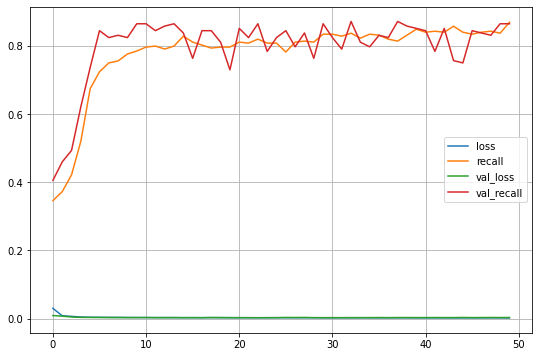

In [33]:
plt.figure(figsize = (9, 6))
plt.plot(History_fraud.history['loss'])
plt.plot(History_fraud.history['recall'])
plt.plot(History_fraud.history['val_loss'])
plt.plot(History_fraud.history['val_recall'])

plt.legend(History_fraud.history.keys())
plt.grid()
plt.show()

### 4) Model Evaluate

In [34]:
loss, recall = Model_fraud.evaluate(X_test, y_test)

print('Loss = {:.2f}' .format(loss))
print('Recall = {:.2f}' .format(recall))

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0030 - recall: 0.8649
Loss = 0.00
Recall = 0.86


### 5) Model Predict

In [35]:
np.set_printoptions(suppress = True, precision = 5)
Model_fraud.predict(X_test)

array([[0.00001],
       [0.00105],
       [0.00001],
       ...,
       [0.00002],
       [0.00101],
       [0.00001]], dtype=float32)

In [36]:
y_hat = Model_fraud.predict_classes(X_test)

In [37]:
confusion_matrix(y_test, y_hat)

array([[85274,    21],
       [   20,   128]])

In [38]:
print(classification_report(y_test, y_hat,
                            target_names = ['normal', 'fraud']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     85295
       fraud       0.86      0.86      0.86       148

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

